In [76]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
# Major coffee manufacturers and roasters

In [77]:
## OUTLINE
"""
Introduction discussing the reason for investigating economic factors

Collect and clean all relevant data
    Talk about how we want to look at the major players because they would account for the biggest observable changes

GDP per capita
    DEVELOPING COUNTRIES
    investigate relationship with global prices

Talk about investigating the observed GDP trends further by looking at income shares 

Income Shares
    DEVELOPING COUNTRIES
    top/bottom
    investigate relationship with productivity/global prices/export quantity/domestic consumption
"""

'\nIntroduction discussing the reason for investigatin economic factors\n\nCollect and clean all relevant data\n    Talk about how we want to look at the major players because they would account for the biggest observable changes\n\nGDP per capita\n    DEVELOPING COUNTRIES\n    investigate relationship with global prices\n\nTalk about investigating the observed GDP trends further by looking at income shares \n\nIncome Shares\n    DEVELOPING COUNTRIES\n    top/bottom\n    investigate relationship with productivity/global prices/export quantity/domestic consumption\n'

# ECONOMIC FACTORS

In the global coffe market, the major importers of coffee are developed countries such as Japan, USA and many European countries like Germany, France, etc. On the other hand, the major producers and exporters of coffee are developing nations like Brazil, Vietnam and Indonesia. Furthermore, the coffee farmers in developing countries are low income earners dependent on coffee prices for making a living. Given this information it would make sense that the economic well being of both exporting and importing countries would play an important role in determining the demand and supply of coffee and ultimately its price in the global market.

In order to investigate this idea, we will consider economic factors such as the GDP per capita and the income share of the richest/poorest 20% of importing and exporting countries.

### Gather Data

First we must gather relevant data for our investigation. The world bank has gdp per capita data as well as income share data for many countries going back several decades. We will only consider data for the major importers and exporters for this analysis because they are the most important drivers of observable changes in the global coffee market.

In [195]:
# get coffee production and consumption info
productionDf = pd.read_csv("production.csv")
consumptionDf = pd.read_csv("global_consumption.csv")
prod_countries, cons_countries = productionDf.Country, consumptionDf.Country

# calculate mean production and consumption for each country
prod, cons = productionDf[[str(yr) for yr in range(1990,2013)]], consumptionDf[[str(yr) for yr in range(1990,2013)]]
mean_prod = prod.apply(lambda lst: map(lambda elt: int(elt.replace(',','')),lst)).mean(axis=1)
mean_cons = cons.apply(lambda lst: map(lambda elt: int(str(elt).replace(',','').replace('nan','0')),lst)).mean(axis=1)

# countries to be considered
major_importers = list(cons_countries[mean_cons > 4500])
major_importers.remove('Total')
major_exporters = list(prod_countries[mean_prod > 4500])

print "Biggest coffee importers",major_importers
print "Biggest coffee exporters",major_exporters

Biggest coffee importers ['France', 'Germany', 'Italy', 'Japan', 'USA']
Biggest coffee exporters ['Brazil', 'Indonesia', 'Colombia', 'Mexico', 'Vietnam']


Now we acquire the income shares data.

In [241]:
# Income share of the richest/poorest 20% of exporting and importing countries
poorestdf = pd.read_csv("income_Share/countries_incomeshare_poorest20percent.csv")[['Country Name']+[str(yr) for yr in range(1990,2013)]]
richestdf = pd.read_csv("income_Share/countries_incomeshare_richest20percent.csv")[['Country Name']+[str(yr) for yr in range(1990,2013)]]

richExp, richImp = richestdf.set_index('Country Name').loc[major_exporters], richestdf.set_index('Country Name').loc[major_importers]
poorExp, poorImp = poorestdf.set_index('Country Name').loc[major_exporters], poorestdf.set_index('Country Name').loc[major_importers]

poorExp

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country Name,,,,,,,,,,,,,,,,,,,,,,,
Brazil,2.33,NaN,2.82,2.35,NaN,2.44,2.25,2.3,2.42,2.50,NaN,2.40,2.59,2.59,2.82,2.90,3.00,2.97,3.14,3.17,NaN,3.25,3.38
Indonesia,9.39,NaN,NaN,9.46,NaN,NaN,9.00,NaN,NaN,9.58,NaN,NaN,9.53,NaN,NaN,8.33,NaN,NaN,8.10,NaN,7.63,NaN,NaN
Colombia,NaN,3.61,3.68,NaN,NaN,NaN,2.43,NaN,NaN,2.04,1.90,2.35,2.75,3.29,3.31,3.37,2.19,2.42,2.93,3.06,3.19,3.35,3.29
Mexico,NaN,NaN,4.04,NaN,4.05,NaN,4.38,NaN,4.06,NaN,3.89,NaN,4.31,NaN,4.52,3.69,4.72,NaN,4.76,NaN,4.72,NaN,4.86
Vietnam,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,7.96,NaN,NaN,NaN,7.46,NaN,7.10,NaN,6.88,NaN,6.91,NaN,5.92,NaN,6.52


There seems to be quite a bit of missing information in our data. Let's fill these by using the average income between 1990-2012. We write a function to fill up these missing data.

In [242]:
def clean(df):
    cleanrow = lambda lst: map(lambda elt: np.nanmean(lst) if np.isnan(elt) else elt, lst)
    return df.apply(cleanrow, axis=1)
poorExp, richExp = clean(poorExp), clean(richExp)
poorImp, richImp = clean(poorImp), clean(richImp)
poorExp

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country Name,,,,,,,,,,,,,,,,,,,,,,,
Brazil,2.330000,2.716842,2.8200,2.350000,2.716842,2.440000,2.2500,2.300000,2.420000,2.500000,2.716842,2.400000,2.59,2.590000,2.8200,2.9000,3.0000,2.970000,3.14,3.170000,2.716842,3.250000,3.3800
Indonesia,9.390000,8.877500,8.8775,9.460000,8.877500,8.877500,9.0000,8.877500,8.877500,9.580000,8.877500,8.877500,9.53,8.877500,8.8775,8.3300,8.8775,8.877500,8.10,8.877500,7.630000,8.877500,8.8775
Colombia,2.891765,3.610000,3.6800,2.891765,2.891765,2.891765,2.4300,2.891765,2.891765,2.040000,1.900000,2.350000,2.75,3.290000,3.3100,3.3700,2.1900,2.420000,2.93,3.060000,3.190000,3.350000,3.2900
Mexico,4.333333,4.333333,4.0400,4.333333,4.050000,4.333333,4.3800,4.333333,4.060000,4.333333,3.890000,4.333333,4.31,4.333333,4.5200,3.6900,4.7200,4.333333,4.76,4.333333,4.720000,4.333333,4.8600
Vietnam,7.067500,7.067500,7.7900,7.067500,7.067500,7.067500,7.0675,7.067500,7.960000,7.067500,7.067500,7.067500,7.46,7.067500,7.1000,7.0675,6.8800,7.067500,6.91,7.067500,5.920000,7.067500,6.5200


Now let's gather and clean GDP per capita data

In [316]:
# get GDP per capita data
gdpdf = pd.read_csv("gdp_percapita.csv")[['Country Name']+[str(yr) for yr in range(1990,2013)]]
gdpExp, gdpImp = clean(gdpdf.set_index('Country Name').loc[major_exporters]), clean(gdpdf.set_index('Country Name').loc[major_importers])
print "GDP PER CAPITA FOR COFFEE IMPORTING COUNTRIES"
gdpImp

GDP PER CAPITA FOR COFFEE IMPORTING COUNTRIES


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country Name,,,,,,,,,,,,,,,,,,,,,,,
France,21795.237825,21782.416204,23937.056918,22503.260851,23625.528997,27037.972132,27015.258959,24359.425062,25101.368737,24799.296010,22465.641841,22527.317751,24275.242603,29691.181584,33874.742548,34879.726329,36544.508534,41600.583975,45413.065712,41631.131412,40705.766230,43807.475903,40850.352373
Germany,22219.572183,23269.381797,26333.537445,25488.519519,27087.558454,31715.997816,30538.702497,27012.171321,27300.303251,26756.151677,23685.350747,23654.282765,25170.824207,30318.516414,34120.191264,34650.778176,36401.422507,41762.908911,45632.836781,41671.302697,41725.850072,45867.766480,43931.691709
Italy,20764.652927,21892.079279,23175.245062,18683.758899,19280.866972,20603.893315,23028.506110,21787.701780,22260.812222,21945.506874,20059.210770,20409.003538,22205.841929,27399.105125,31188.622718,31973.934742,33426.166058,37716.449126,40659.670420,36995.107350,35877.871495,38364.941750,34854.397558
Japan,25123.631784,28540.771484,31013.647149,35451.297513,38814.894379,42522.066591,37422.864143,34304.148971,30969.738033,35004.061272,37299.644129,32716.418675,31235.588184,33690.937730,36441.504494,35781.170053,34075.978949,34033.701255,37865.618031,39322.604728,42909.234152,46203.709519,46679.265432
USA,23954.443300,24405.192485,25492.955550,26464.821733,27776.616526,28782.175020,30068.227206,31572.690230,32949.197764,34620.928899,36449.855116,37273.618103,38166.037841,39677.198348,41921.809762,44307.920585,46437.067117,48061.537661,48401.427340,47001.555350,48374.056457,49781.357490,51456.658728


Correlation between prices and average GDP of coffee importing countries 0.731790982416


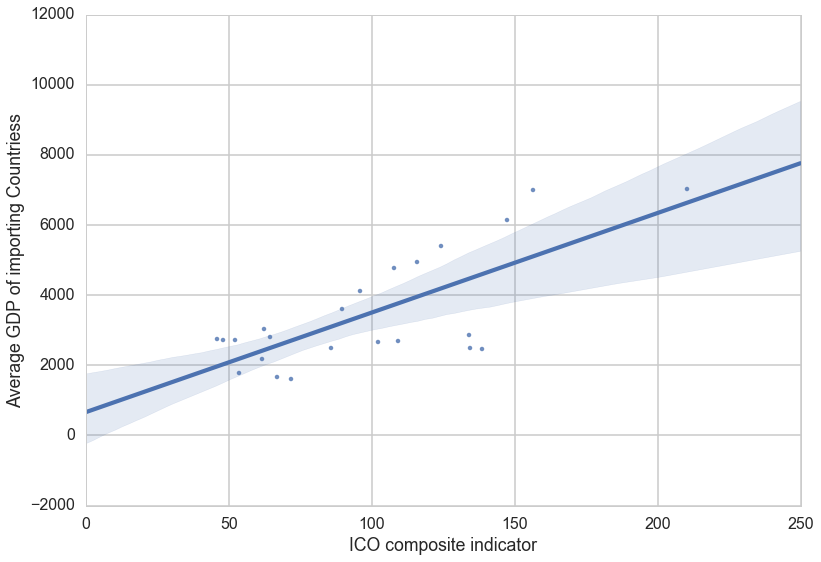

In [346]:
def filter_rows(df, start, end):
    return df.loc[filter(lambda i: int(i.year) >= start and int(i.year) <= end, df.index)]

pricedf = pd.DataFrame.from_csv('yearly_prices.csv')
pricedf.index = pd.to_datetime(pricedf.index)

prices = filter_rows(pricedf, 1990, 2012)['ICO composite indicator']

avg_gdpImp = gdpImp.mean(axis=0)
avg_gdpImp.name = 'Average GDP of importing Countriess'
sns.regplot(prices, avg_gdpImp)
print "Correlation between prices and average GDP of coffee importing countries",avg_gdpImp.corr(prices)


Correlation between prices and average GDP of coffee importing countries 0.731790982416


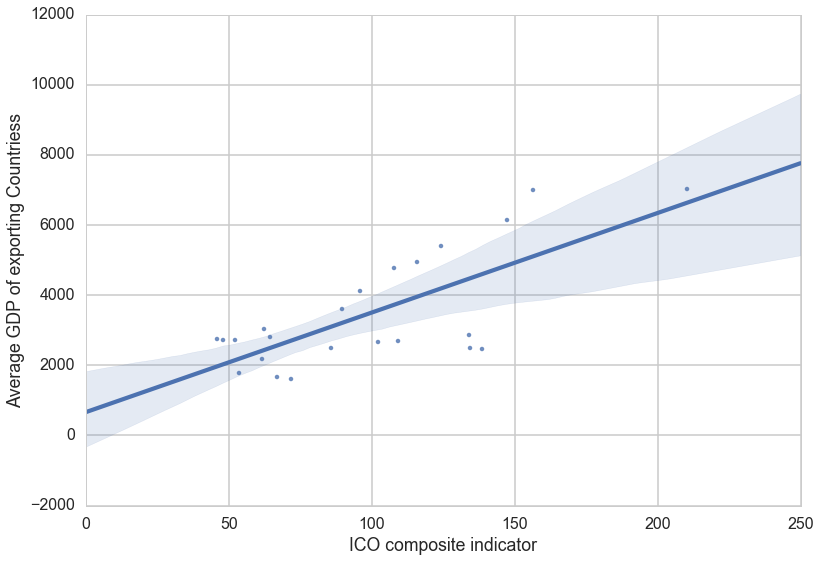

In [347]:
avg_gdpExp = gdpExp.mean(axis=0)
avg_gdpExp.name = 'Average GDP of exporting Countriess'
sns.regplot(prices, avg_gdpExp)
print "Correlation between prices and average GDP of coffee importing countries", avg_gdpExp.corr(prices)

In [243]:
# read in historical country population data
population = pd.read_csv("population.csv")
population[population['Country Name'] == 'Nigeria']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
164,Nigeria,NGA,"Population, total",SP.POP.TOTL,45211614,46144154,47117859,48128460,49169819,50238569,51336375,52468593,53640547,54859201,56131844,57453734,58829319,60285453,61857023,63565598,65426976,67425435,69512233,71619216,73698096,75729572,77729802,79729311,81775215,83901570,86118043,88412917,90773613,93179755,95617345,98085436,100592458,103145093,105753088,108424822,111164651,113975055,116860691,119826231,122876723,126014935,129246283,132581484,136033321,139611303,143318011,147152502,151115683,155207145,159424742,163770669,168240403,172816517,177475986,NaN,NaN
